## Project Description:

#### General Instruction

- Read data into Jupyter notebook using pandas to import data into a data frame. 


#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data, and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 



# Classification

### Data preparation

In [85]:
# Load the libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# Load the training dataset
# We will use this dataset to train the model and evaluate the model performance
train_data = pd.read_csv("/Users/saivamshipalakurthi/Downloads/Classification_train (1).csv",index_col=0)

#Load the test dataset
test_data = pd.read_csv("/Users/saivamshipalakurthi/Downloads/Classification_test (1).csv",index_col=0)
 

In [87]:
# Display information about the training dataset, including column names, data types, and non-null counts
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8909 entries, 0 to 8908
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           8909 non-null   int64  
 1   Administrative_Duration  8909 non-null   float64
 2   Informational            8909 non-null   int64  
 3   Informational_Duration   8909 non-null   float64
 4   ProductRelated           8909 non-null   int64  
 5   ProductRelated_Duration  8909 non-null   float64
 6   BounceRates              8909 non-null   float64
 7   ExitRates                8909 non-null   float64
 8   PageValues               8909 non-null   float64
 9   SpecialDay               8909 non-null   float64
 10  Month                    8909 non-null   object 
 11  OperatingSystems         8909 non-null   int64  
 12  Browser                  8909 non-null   int64  
 13  Region                   8909 non-null   int64  
 14  TrafficType              8909

In [88]:
# Display information about the test dataset, including column names, data types, and non-null counts
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 0 to 1571
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           1572 non-null   int64  
 1   Administrative_Duration  1572 non-null   float64
 2   Informational            1572 non-null   int64  
 3   Informational_Duration   1572 non-null   float64
 4   ProductRelated           1572 non-null   int64  
 5   ProductRelated_Duration  1572 non-null   float64
 6   BounceRates              1572 non-null   float64
 7   ExitRates                1572 non-null   float64
 8   PageValues               1572 non-null   float64
 9   SpecialDay               1572 non-null   float64
 10  Month                    1572 non-null   object 
 11  OperatingSystems         1572 non-null   int64  
 12  Browser                  1572 non-null   int64  
 13  Region                   1572 non-null   int64  
 14  TrafficType              1572

In [89]:

#let us perform one-hot encoding to convert categorical into numeric
# Let us do the get_dummies
train_data = pd.get_dummies(train_data, columns=['Month', 'VisitorType'], drop_first=True)
train_data.info()

# For test dataset

test_data = pd.get_dummies(test_data, columns=['Month', 'VisitorType'], drop_first=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8909 entries, 0 to 8908
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 8909 non-null   int64  
 1   Administrative_Duration        8909 non-null   float64
 2   Informational                  8909 non-null   int64  
 3   Informational_Duration         8909 non-null   float64
 4   ProductRelated                 8909 non-null   int64  
 5   ProductRelated_Duration        8909 non-null   float64
 6   BounceRates                    8909 non-null   float64
 7   ExitRates                      8909 non-null   float64
 8   PageValues                     8909 non-null   float64
 9   SpecialDay                     8909 non-null   float64
 10  OperatingSystems               8909 non-null   int64  
 11  Browser                        8909 non-null   int64  
 12  Region                         8909 non-null   int64 

In [90]:
# Separate features (X) and target variable (y)
X = train_data.drop(columns=['Revenue'],axis=1)  # Extracts all columns except 'Revenue' as features
y = train_data['Revenue']  # Selects 'Revenue' column as the target variable

In [91]:
from sklearn.preprocessing import StandardScaler

scaler_classification = StandardScaler()
X_scaled = scaler_classification.fit_transform(X)

Text(0, 0.5, "Ward's Distance")

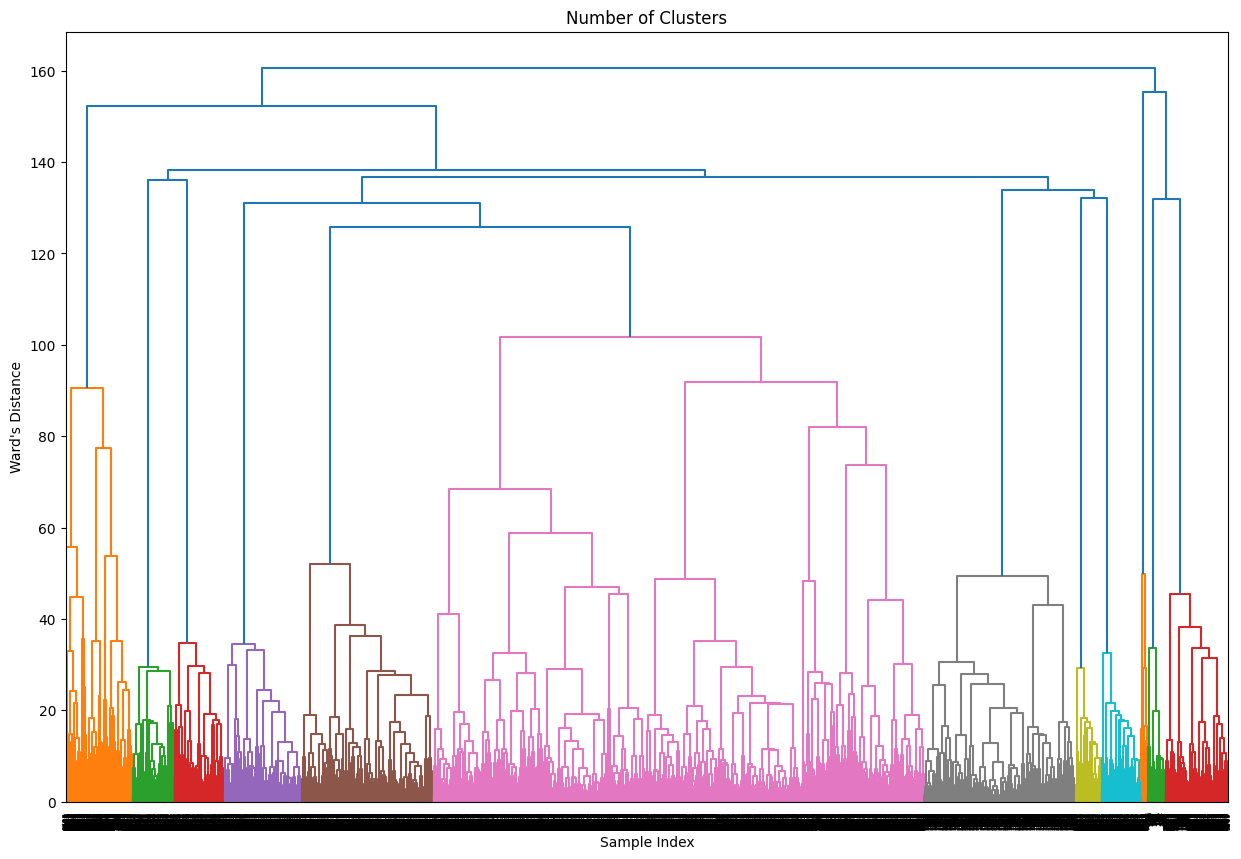

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage

#let us do the dendrogram
linked_dendrogram = linkage(X_scaled, 'ward')


plt.figure(figsize=(15, 10))
dendrogram(linked_dendrogram, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Number of Clusters')
plt.xlabel('Sample Index')
plt.ylabel('Ward\'s Distance')

In [93]:
#let us split the dataset into train and test using train_test_split
#we have set the randon_state to 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

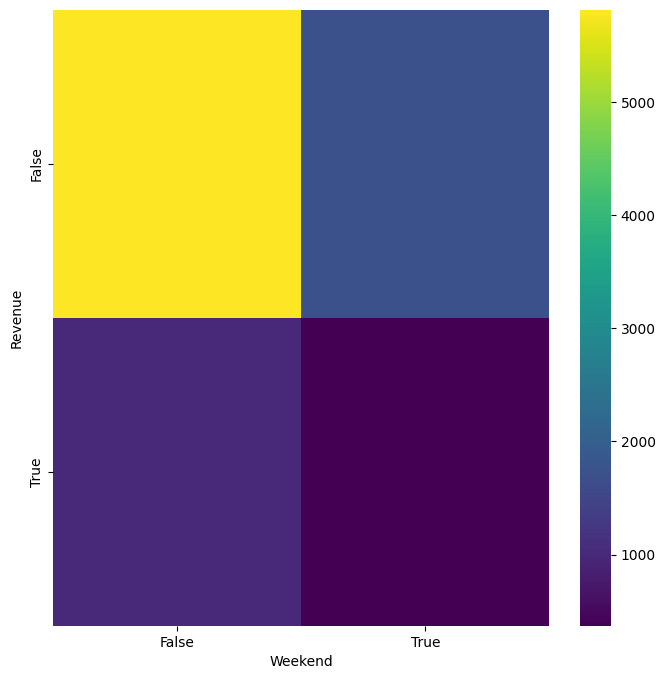

In [94]:
# let us print the confusion matrix for revenue and weekend
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Revenue'].value_counts()
    for x_label, grp in train_data.groupby('Weekend')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Weekend')
_ = plt.ylabel('Revenue')

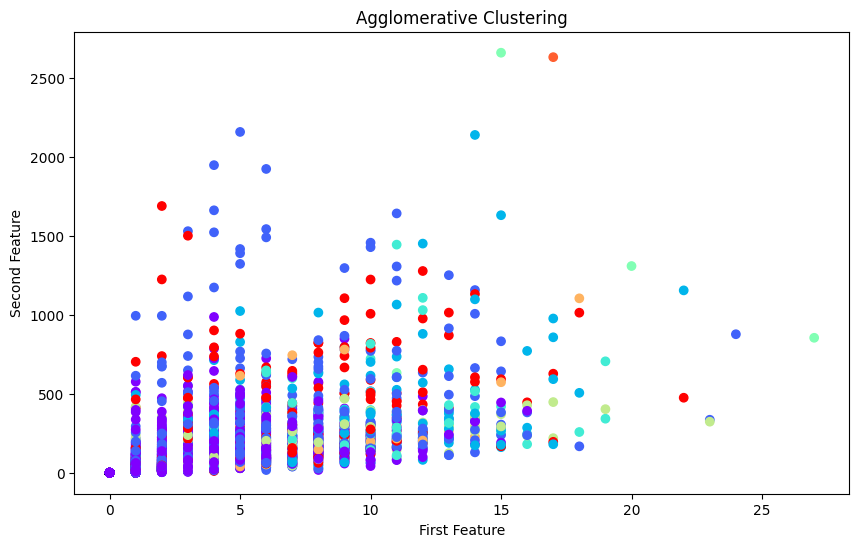

In [95]:
from sklearn.cluster import AgglomerativeClustering
#from dendrogram we have found the clusters and let us do the agglomerative clustering.
found_clusters = 9
agglomerative_clustering_class = AgglomerativeClustering(n_clusters=found_clusters, linkage='ward')
agg_labels = agglomerative_clustering_class.fit_predict(X_train)

#let us plot the clustering.
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=agg_labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.show()


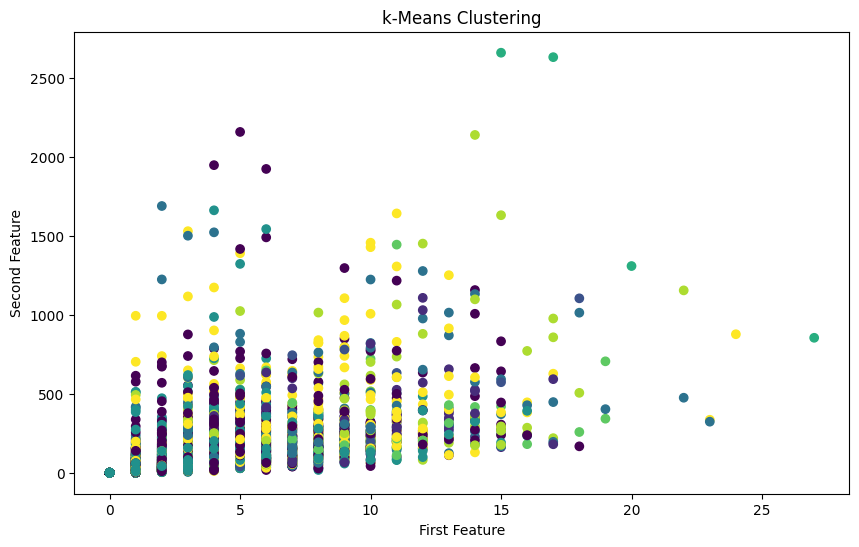

In [96]:
from sklearn.cluster import KMeans

#let us do the kmeans clustering.
k_means_clustering = KMeans(n_clusters=found_clusters, random_state=3)
kmeans_labels = k_means_clustering.fit_predict(X_train)

#let su plot the kmeans clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('k-Means Clustering')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.show()


### Classification model training

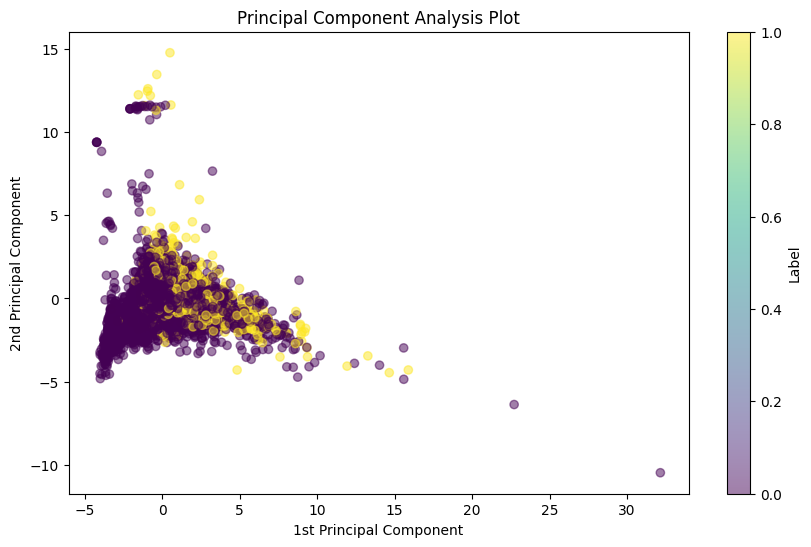

In [97]:
from sklearn.decomposition import PCA

#let us perform the principal component analysis
principal_component_analysis = PCA(n_components=2)  
X_principal_component_analysis = principal_component_analysis.fit_transform(X_scaled)  

# let us do the explained variance ratio
explained_variance = principal_component_analysis.explained_variance_ratio_


# let us the plot the PCA graph
plt.figure(figsize=(10, 6))
plt.scatter(X_principal_component_analysis[:, 0], X_principal_component_analysis[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.colorbar(label='Label')
plt.title('Principal Component Analysis Plot')
plt.show()


In [98]:
# let us do the Manual Iteration for Hyperparameter Search
train_scores = []
test_scores = []
hyperparameters = []
for n_estimators, max_features, max_samples, max_depth in product([50, 100, 200, 500], [0.1, 0.5,0.1], [0.1, 0.5,0.1], [1, 2, 5 , 10]):
    rfc = RandomForestClassifier(random_state=3, n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, max_depth=max_depth)
    rfc.fit(X_train, y_train)
    train_score = rfc.score(X_train, y_train)
    test_score = rfc.score(X_test, y_test)
    print(train_score,test_score)
    train_scores.append(train_score)
    test_scores.append(test_score)
    hyperparameters.append((n_estimators, max_features, max_samples, max_depth))

0.8470604742528413 0.8462401795735129
0.8470604742528413 0.8462401795735129
0.8493054581170197 0.8479236812570146
0.8947663813666339 0.8866442199775533
0.8470604742528413 0.8462401795735129
0.8470604742528413 0.8462401795735129
0.8481829661849305 0.845679012345679
0.9203030728216641 0.8922558922558923
0.8470604742528413 0.8462401795735129
0.8470604742528413 0.8462401795735129
0.8493054581170197 0.8479236812570146
0.8947663813666339 0.8866442199775533
0.8470604742528413 0.8462401795735129
0.8967307422477901 0.9023569023569024
0.9103409569243721 0.9107744107744108
0.9226883681773538 0.9107744107744108
0.8470604742528413 0.8462401795735129
0.8981338571629016 0.9034792368125701
0.9165146625508629 0.9102132435465768
0.9538375192928301 0.9085297418630752
0.8470604742528413 0.8462401795735129
0.8967307422477901 0.9023569023569024
0.9103409569243721 0.9107744107744108
0.9226883681773538 0.9107744107744108
0.8470604742528413 0.8462401795735129
0.8470604742528413 0.8462401795735129
0.84930545811

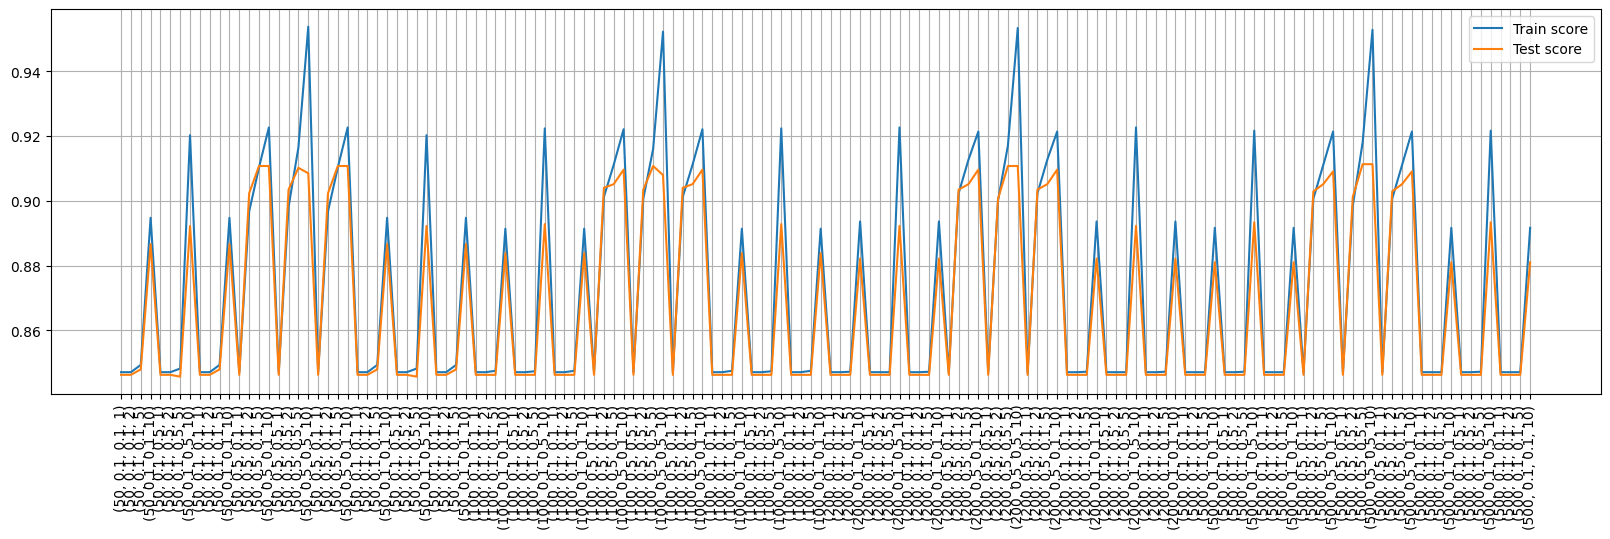

In [99]:
%matplotlib inline
plt.subplots(figsize=(20, 5))

# let us plot the train scores
plt.plot(range(len(hyperparameters)), train_scores, label='Train score')
# let us plot the test scores
plt.plot(range(len(hyperparameters)), test_scores, label='Test score')
plt.xticks(range(len(hyperparameters)), hyperparameters, rotation=90)
# let us add a legend to the plot
plt.legend()
# let us add a grid to the plot
plt.grid()

In [100]:
print("Best Hyper Parameters: ",hyperparameters[np.argmax(np.array(test_scores))]," ","With Accuracy: ",test_scores[np.argmax(np.array(test_scores))])

Best Hyper Parameters:  (500, 0.5, 0.5, 5)   With Accuracy:  0.9113355780022446


### Classification prediction

In [101]:
rfc = RandomForestClassifier(random_state= 3, 
                             n_estimators = 500,
                             max_samples= 0.5, 
                             max_features= 0.5,
                             max_depth= 10)

rfc.fit(X_train, y_train)
print('Train score: ', rfc.score(X_train, y_train))
print('Test score: ', rfc.score(X_test, y_test))

Train score:  0.952855338852252
Test score:  0.9113355780022446


<Figure size 1600x600 with 0 Axes>

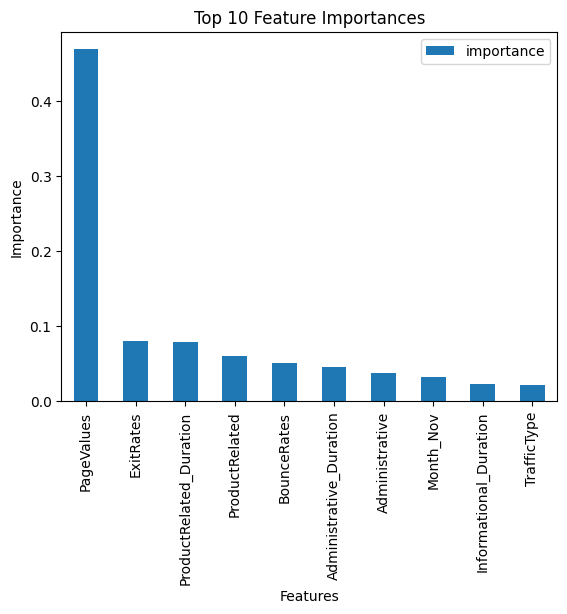

In [102]:
feature_importances=pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(16, 6))
feature_importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [103]:
from sklearn.tree import DecisionTreeClassifier

decision_Tree_classifier = DecisionTreeClassifier(random_state=3, 
                                                  max_depth=10)
decision_Tree_classifier.fit(X_train,y_train)
print("Train Score: ", decision_Tree_classifier.score(X_train,y_train))
print("Test Score: ", decision_Tree_classifier.score(X_test, y_test))

Train Score:  0.9562228146485197
Test Score:  0.8933782267115601


In [104]:
from sklearn.svm import SVC
svm_classification = SVC(kernel='rbf',
                         C=1.0,
                         gamma='scale',
                         random_state=3)

svm_classification.fit(X_train,y_train)
print("Train Score: ", svm_classification.score(X_train,y_train))
print("Test Score: ", svm_classification.score(X_test, y_test))

Train Score:  0.8491651466255087
Test Score:  0.8468013468013468


In [105]:
from sklearn.neighbors import KNeighborsClassifier
K_Neighbors_Classifier = KNeighborsClassifier(n_neighbors=5,
                                              metric='euclidean')
K_Neighbors_Classifier.fit(X_train,y_train)
print("Train Score: ", K_Neighbors_Classifier.score(X_train,y_train))
print("Test Score: ", K_Neighbors_Classifier.score(X_test,y_test))

Train Score:  0.8936438894345446
Test Score:  0.8613916947250281


In [106]:
# Pedict the values for test dataset
# Classification_test.csv
predictions = rfc.predict(test_data)
predictions

array([False, False, False, ...,  True, False, False])

In [107]:
predictions = rfc.predict_proba(test_data)
predictions

array([[5.24580805e-01, 4.75419195e-01],
       [9.88927863e-01, 1.10721366e-02],
       [7.55153463e-01, 2.44846537e-01],
       ...,
       [4.52054459e-01, 5.47945541e-01],
       [9.99888832e-01, 1.11167520e-04],
       [9.61482419e-01, 3.85175815e-02]])

# In this comparison, the Random Forest Classifier performs better than the other models because it attains more accuracy on the test set and exhibits better generalization from training to testing data.